In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

# Predicting Phishing Web Page Using Machine Learning

Phishing is a method of trying to gather personal information using deceptive e-mails and websites.

In this notebook, we will read the data and look at what are the features that can give us information on what are the attributes of a phishing website

# Loading the data

We will start by loading the provided csv data using pandas read_csv method

In [2]:
data = pd.read_csv("D:\PROJECTS\Dataset\Phishing_Legitimate_full.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\rahil\AppData\Local\Temp\ipykernel_14692\2859278723.py:1: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv("D:\PROJECTS\Dataset\Phishing_Legitimate_full.csv")


# Convert data 

In this phase we will convert float64 and int64 data to type 32, by doing this we can save the memory usage and we can prepare the data for using with CuML later for training purpose

As we can see the data has 10k rows and 50 columns including labels

In [3]:
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')
    
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [4]:
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

# View the data

Lets look at random 5 rows from the dataset, it seems like we have mix of ranged data, some column have smaller range compared to others

In [5]:
data.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
9379,9380,2,1,2,51,2,0,0,0,0,0,0,0,0,7,1,1,0,0,0,0,19,25,0,0,0,0,0.149254,0.315789,0,1,0,0,0,0.074627,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0
3861,3862,2,1,0,38,1,1,0,0,0,0,0,0,0,2,1,1,0,0,0,0,30,1,0,0,0,0,0.000000,0.250000,1,1,0,0,0,0.882353,0,0,0,0,0,0,0,0,1,1,1,1,0,-1,1
2225,2226,2,0,3,202,3,0,0,0,6,0,6,5,0,5,1,0,0,0,1,0,14,34,146,0,1,0,0.040541,0.178571,0,1,0,1,0,0.000000,0,0,0,0,0,0,0,0,1,-1,1,0,0,1,1
4722,4723,3,1,1,42,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,23,12,0,0,0,0,1.000000,1.000000,1,1,0,1,0,0.000000,1,0,0,0,0,0,0,0,1,1,-1,0,-1,-1,1
3581,3582,3,1,12,155,1,0,0,0,1,0,0,0,0,48,1,1,0,0,1,0,17,131,0,0,1,0,0.066667,0.125000,1,1,1,0,1,0.000000,0,0,0,0,0,1,0,0,1,-1,1,-1,0,1,1


# Summary Statistics

By using the describe method, we can see some of the columns have high variance and some have smaller variance, this is due to the fact that some of the column have bigger values and bigger ranges

In [6]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000

# Balance/Imbalanced Data

The data is balanced for non-phising and phising label

<Axes: xlabel='labels'>

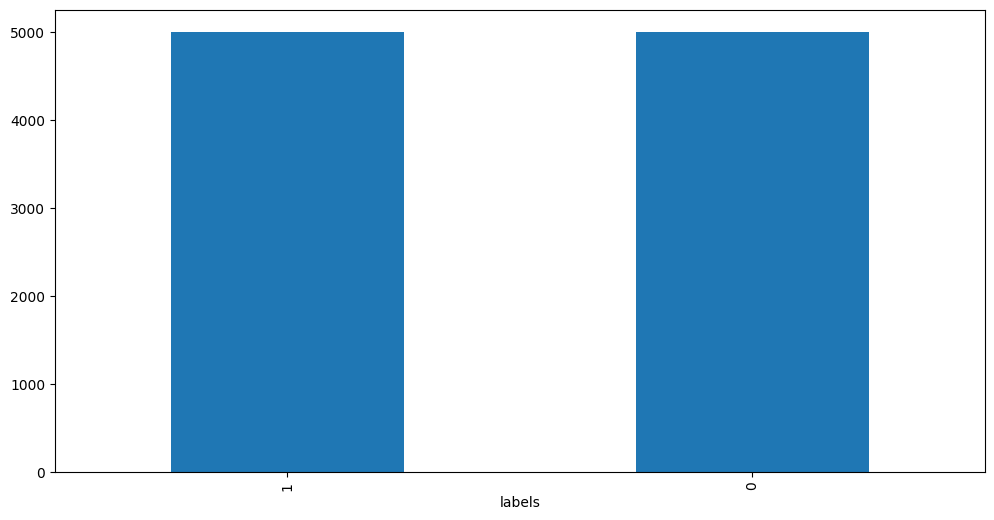

In [7]:
data['labels'].value_counts().plot(kind='bar')

# Spearman Correlation

By looking the spearman correlation, we can find which features are linearly correlated in terms of predicting if a site is phising or not

In [8]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

# First 10 columns

By looking at the first 10 columns against labels, we can concluded that non of the features have strong correlation with the labels, however, NumDash has some significant negative effect towards the labels, which could mean if there is less number of dash then it is more likely to be phising site

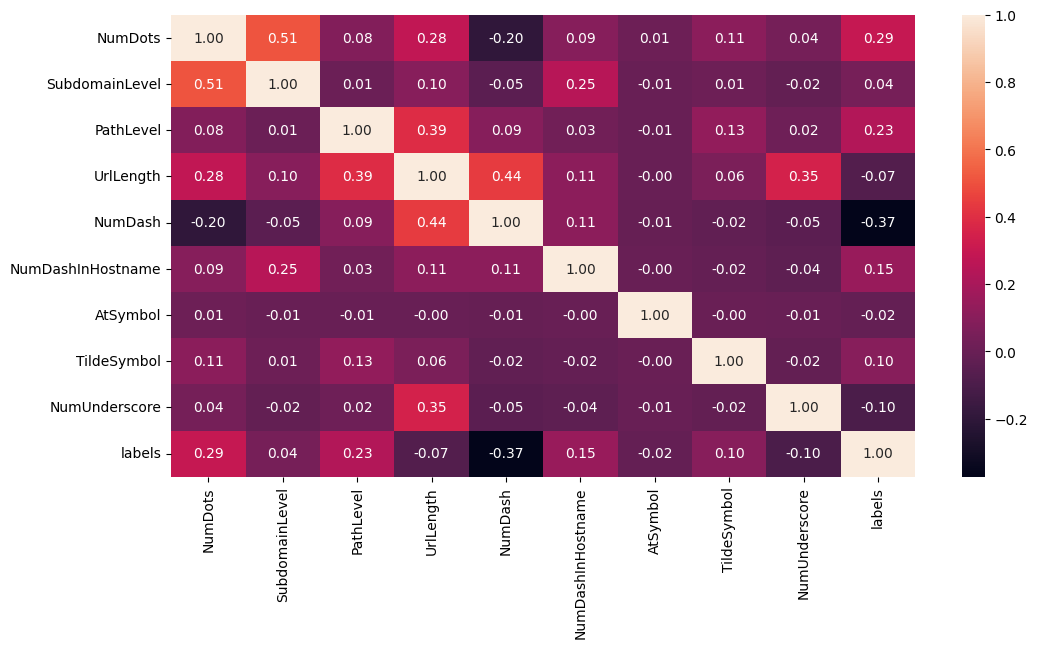

In [9]:
corr_heatmap(data, 0, 10)

# Columns 10 to 20

There are no strong or even medium level strength correlation features with labels

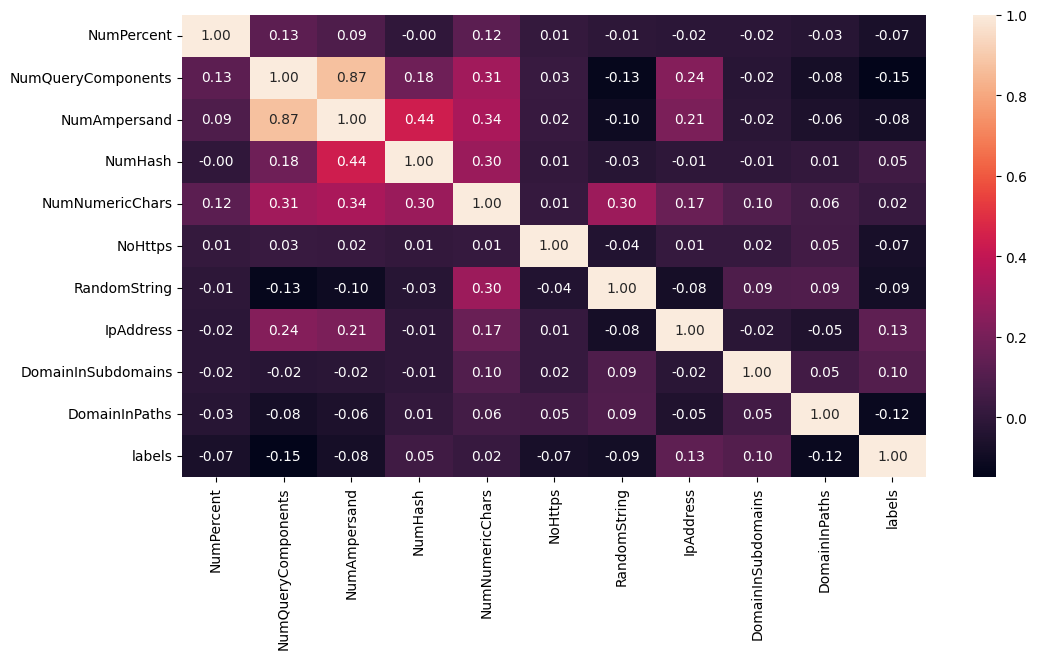

In [10]:
corr_heatmap(data, 10, 20)

# Columns 20 to 30

Still no strong correlation feature

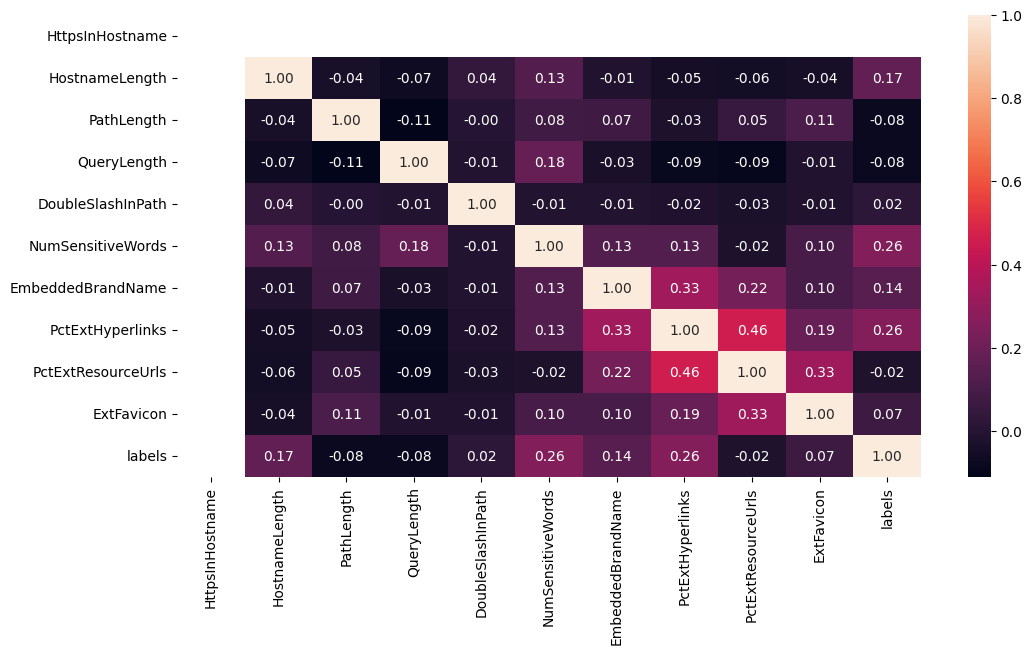

In [11]:
corr_heatmap(data, 20, 30)

# Columns 30 to 40

Well here we have a few features that are linearly correlated to our dep variable

* InsecureForms shows that as the value is higher so the probability of being a phising site
* PctNullSelfRedirectHyperlinks shows the same positive correlation as InsecureForms
* FequentDomainNameMismatch shows that it has medium linear correlation in positive direction
* SubmitInfoToEmail seems to indicate that sites that ask users to submit their details to emails seems to be more high probability for phising

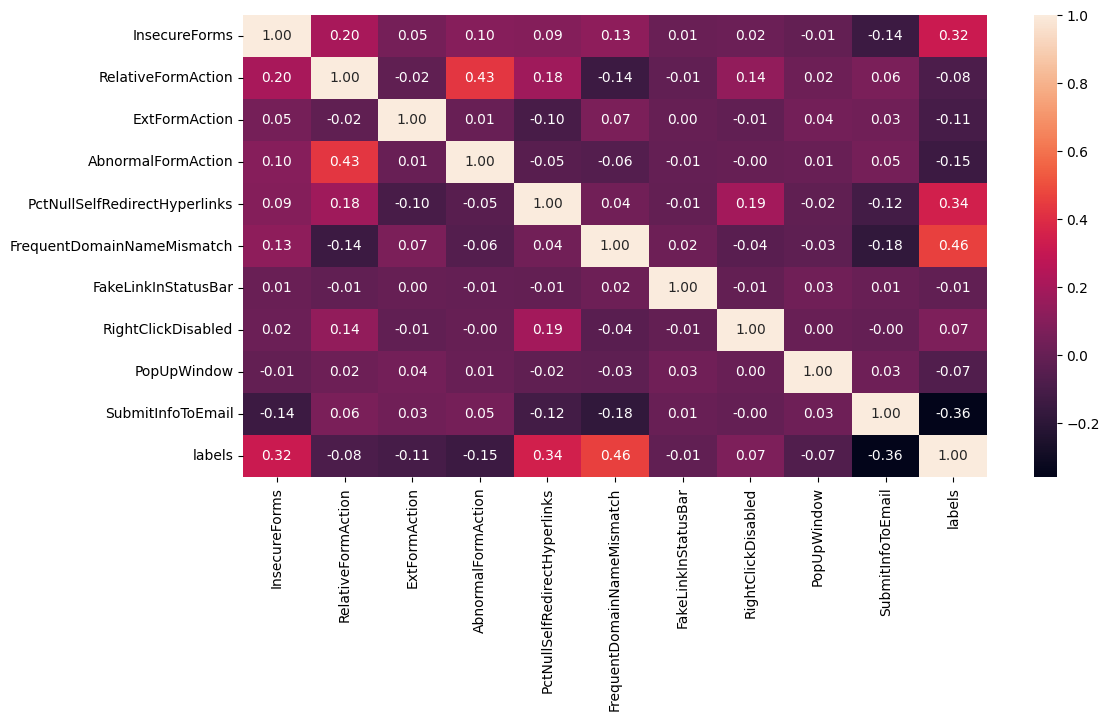

In [12]:
corr_heatmap(data, 30, 40)

# Columsn 40 to 50

The only column in this group that has some correlation with labels is PctExtNullSelfRedirectHyperlinksRT and it has negative effect towards labels which could mean that when the number of percent of null self redirect hyperlinks occur hence the probabiliy of phising increases

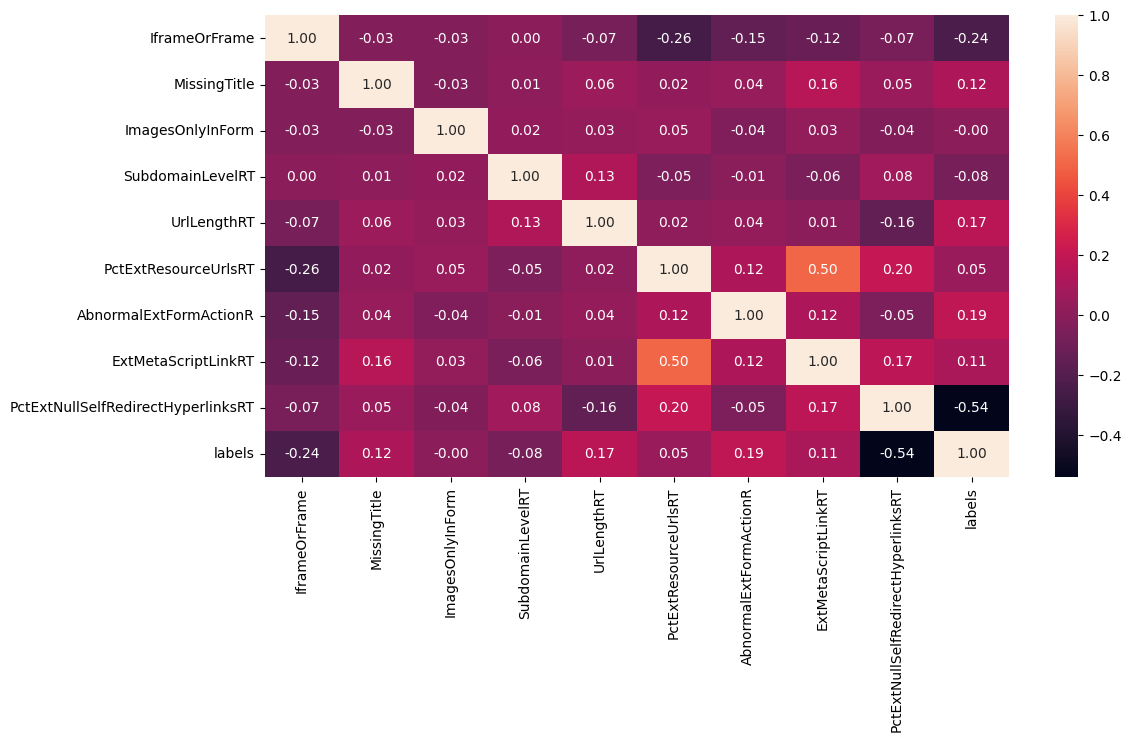

In [13]:
corr_heatmap(data, 40, 50)

# Mutual Info

We will use mutual info classifier to find non linear and linear correlation betweem the features and labels

In [14]:
from sklearn.feature_selection import mutual_info_classif

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
X = data.drop(['id', 'labels'], axis=1)
y = data['labels']

In [16]:
discrete_features = X.dtypes == int

Here we process the scores and we can see that now mutual info is showing a bit different list from spearman corr

In [17]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      0.466468
PctExtResourceUrls                    0.287948
PctNullSelfRedirectHyperlinks         0.224680
PctExtNullSelfRedirectHyperlinksRT    0.218247
NumNumericChars                       0.131774
FrequentDomainNameMismatch            0.124296
ExtMetaScriptLinkRT                   0.121077
NumDash                               0.110516
SubmitInfoToEmail                     0.080530
NumDots                               0.062004
PathLength                            0.058226
InsecureForms                         0.051746
PathLevel                             0.050815
QueryLength                           0.047440
NumSensitiveWords                     0.042470
UrlLength                             0.040701
IframeOrFrame                         0.027984
PctExtResourceUrlsRT                  0.025875
NumQueryComponents                    0.024486
UrlLengthRT                           0.022790
HostnameLength                        0.017741
AbnormalExtFo

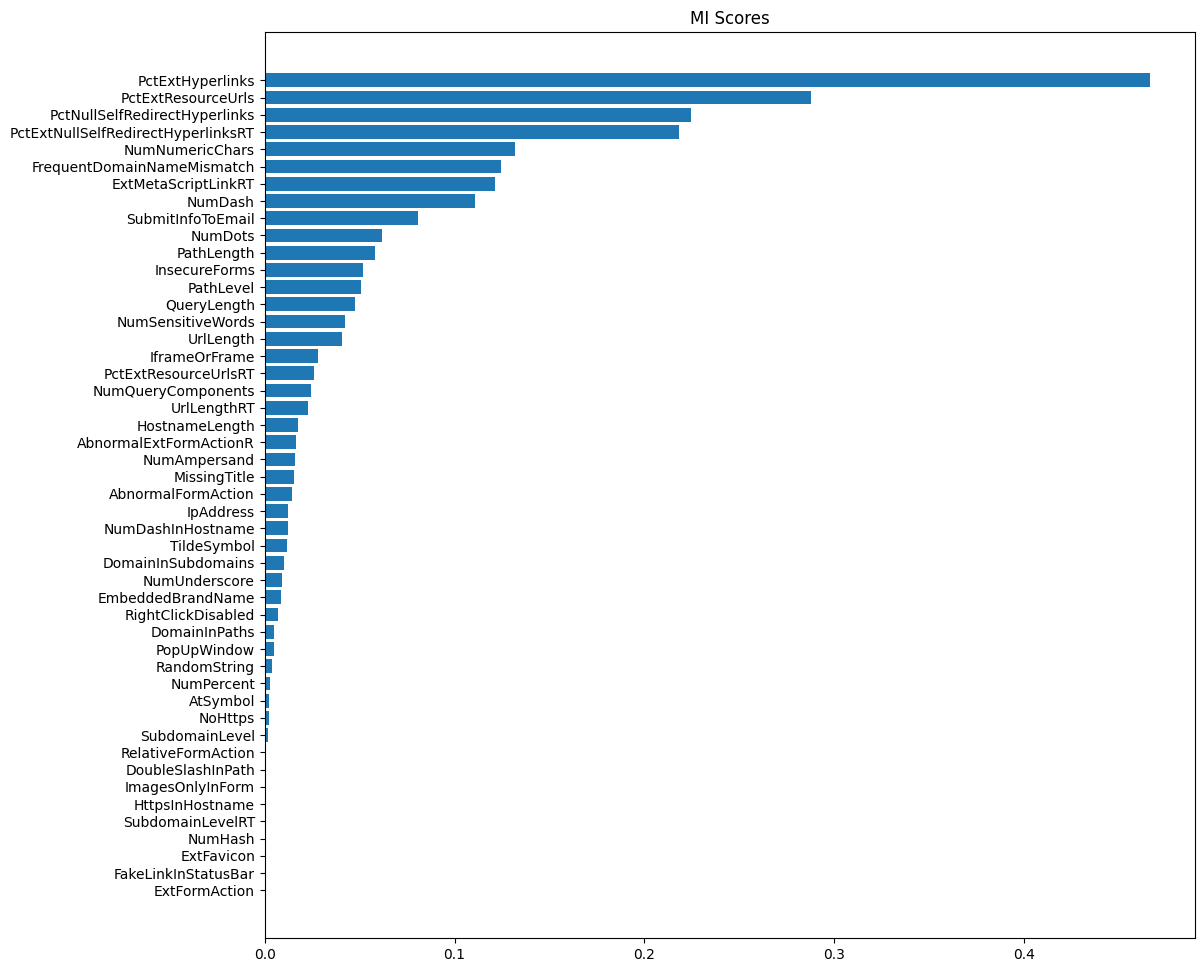

In [18]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

# Prediction

We will first use logistic regression as for baseline, then try to beat the baseline using random forest classifer

Our evaluation metrics will be accuracy, precision, recall and f1 score

Below we import all the required modules

In [19]:
from sklearn.linear_model import LogisticRegression
#from cuml.ensemble import RandomForestClassifier as cuRfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train logistic models

This method is to perform a repetative training process using logistic regression model, the purpose for this is to find the optimal number of features that can be used to find the best fitted model without adjusting much of the hyperparameters, hence the idea here is to go with Data-Centric training, basically the method takes number of top N features to be used for training the model and all the evaluation metrics are returned for evaluation purpose

In [20]:
def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

Here the loop will be starting from 20 as we will start training with top 20 features up to all 50 features to find optimal number of features needed for this problem

In [21]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision : 0.9185929648241206, recall : 0.9326530612244898, f1 score : 0.9255696202531645, accuracy : 0.9265
Performance for Logistic Model with Top 21 features is precision : 0.9161676646706587, recall : 0.9415384615384615, f1 score : 0.9286798179059179, accuracy : 0.9295
Performance for Logistic Model with Top 22 features is precision : 0.9107662463627546, recall : 0.9523326572008114, f1 score : 0.9310857709469509, accuracy : 0.9305
Performance for Logistic Model with Top 23 features is precision : 0.9151219512195122, recall : 0.9465186680121089, f1 score : 0.9305555555555556, accuracy : 0.93
Performance for Logistic Model with Top 24 features is precision : 0.91991991991992, recall : 0.9226907630522089, f1 score : 0.9213032581453635, accuracy : 0.9215
Performance for Logistic Model with Top 25 features is precision : 0.9275653923541247, recall : 0.9350912778904665, f1 score : 0.9313131313131313, accuracy : 0.932
Performance for

In [22]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.918593,0.932653,0.925570,0.9265
1,21,0.916168,0.941538,0.928680,0.9295
2,22,0.910766,0.952333,0.931086,0.9305
3,23,0.915122,0.946519,0.930556,0.9300
4,24,0.919920,0.922691,0.921303,0.9215
5,25,0.927565,0.935091,0.931313,0.9320
6,26,0.932673,0.928079,0.930370,0.9295
7,27,0.931731,0.930836,0.931283,0.9285
8,28,0.903290,0.934985,0.918864,0.9200
9,29,0.914830,0.932584,0.923622,0.9245


# Visualize Logistic Reg Performance

As we can see, the model had ups and downs during the training as more number of features were added, as our target is to maximize all the metrics we have to find the number of features that gives us the best of all metrics, from the figure below, we can see that recall is constantly performing good but our model tend to have problem with precision score, hence to choose the best N of features, we have to pick the area where all the metrics are performing and based on the figure I would say its around 39 features

<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

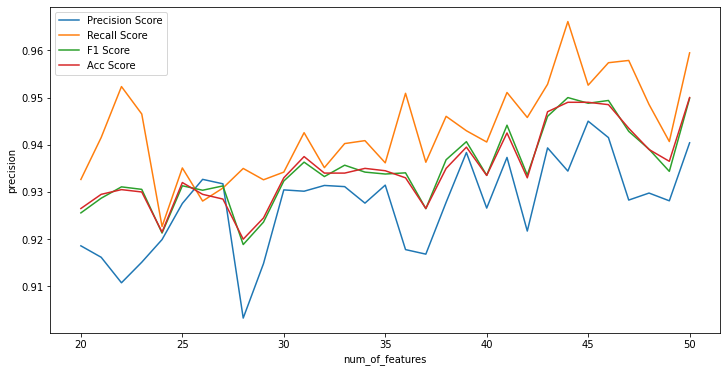

In [23]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

# Training Cattboost Classifier on GPU

It is the same method as logistic reg, the only diff is that we are now using random forest classifier for training and trying to beat the logistic baseline

In [24]:
from catboost import CatBoostClassifier

In [25]:
def train_clf(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    

    clf = CatBoostClassifier(iterations=200,learning_rate=0.1)
    
    clf.fit(X_train, y_train,verbose=False)

    
    y_pred = clf.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [26]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_clf(data, i)
    print("Performance for clf Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for clf Model with Top 20 features is precision : 0.9806320081549439, recall : 0.9876796714579056, f1 score : 0.9841432225063939, accuracy : 0.9845
Performance for clf Model with Top 21 features is precision : 0.9761904761904762, recall : 0.9915878023133544, f1 score : 0.983828899321857, accuracy : 0.9845
Performance for clf Model with Top 22 features is precision : 0.9869739478957916, recall : 0.9879638916750251, f1 score : 0.987468671679198, accuracy : 0.9875
Performance for clf Model with Top 23 features is precision : 0.9805327868852459, recall : 0.9825462012320328, f1 score : 0.9815384615384616, accuracy : 0.982
Performance for clf Model with Top 24 features is precision : 0.9823874755381604, recall : 0.9833496571988247, f1 score : 0.9828683308859519, accuracy : 0.9825
Performance for clf Model with Top 25 features is precision : 0.9889558232931727, recall : 0.9830339321357285, f1 score : 0.985985985985986, accuracy : 0.986
Performance for clf Model with Top 26 feature

In [27]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.980632,0.987680,0.984143,0.9845
1,21,0.976190,0.991588,0.983829,0.9845
2,22,0.986974,0.987964,0.987469,0.9875
3,23,0.980533,0.982546,0.981538,0.9820
4,24,0.982387,0.983350,0.982868,0.9825
5,25,0.988956,0.983034,0.985986,0.9860
6,26,0.979592,0.974855,0.977218,0.9765
7,27,0.978395,0.986515,0.982438,0.9830
8,28,0.981336,0.986180,0.983752,0.9835
9,29,0.984955,0.985944,0.985449,0.9855


# Visualize CatBoostClassifier Performance

Our goal is to beat logistic regression baseline which is

* accuracy = 0.947162
* precision = 0.957468
* recall = 0.952287
* f1_score = 0.9515

So by visualizing the figure below, we can conclude that the best number of features for this model would be 32, one less than logistic regression, the reason why I chose 32 is because that is the number of features that allowed the model to perform the best across all the evaluation metric

<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

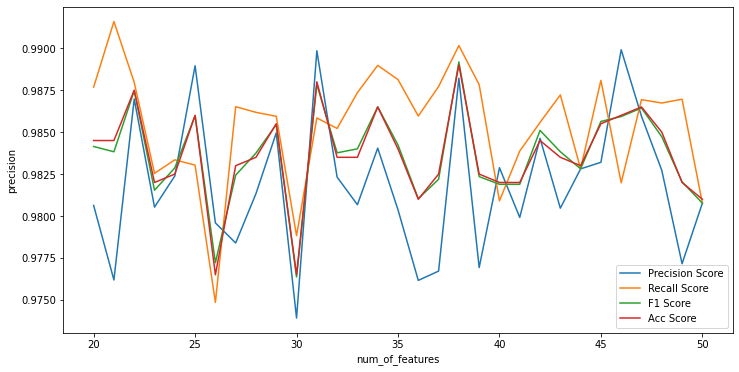

In [28]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

# Final CatBoostClassifier Model

Lets train the final CatBoostClassifier based on the optimal N number of features

In [29]:
top_n_features = mi_scores.sort_values(ascending=False).head(51).index.tolist()
X = data[top_n_features]
y = data['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

clf = CatBoostClassifier(loss_function='Logloss',
                         verbose = False,
                        eval_metric='AUC',
                        iterations=500,
                         thread_count = None,
                        random_state=1)
    
clf.fit(X_train, y_train,verbose=False)


y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(27, precision, recall, f1, accuracy))

Performance for RFC Model with Top 27 features is precision : 0.9817444219066938, recall : 0.9877551020408163, f1 score : 0.9847405900305187, accuracy : 0.985


# Performance

The model is now capable of predicting at up to 98% accuracy and also precision and recall, this shows the model has high confidence in predicting phishing or non-phishing site

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1020
           1       0.98      0.99      0.98       980

    accuracy                           0.98      2000
   macro avg       0.98      0.99      0.98      2000
weighted avg       0.99      0.98      0.99      2000



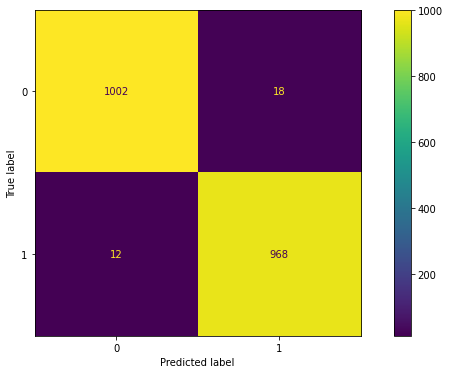

In [31]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# <a href="https://techfor-today.com/sklearn-confusion-matrix-in-machine-learning/">confusion matrix</a> plotting
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [32]:
from lightgbm import LGBMClassifier

In [33]:
def train_LGBM(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    

    LGBM = LGBMClassifier()
    
    LGBM.fit(X_train, y_train)

    
    y_pred = LGBM.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [34]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_LGBM(data, i)
    print("Performance for clf Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for clf Model with Top 20 features is precision : 0.9876543209876543, recall : 0.9825997952917093, f1 score : 0.9851205746536684, accuracy : 0.9855
Performance for clf Model with Top 21 features is precision : 0.9820359281437125, recall : 0.9771598808341608, f1 score : 0.9795918367346937, accuracy : 0.9795
Performance for clf Model with Top 22 features is precision : 0.9840478564307079, recall : 0.987, f1 score : 0.9855217174238642, accuracy : 0.9855
Performance for clf Model with Top 23 features is precision : 0.9880239520958084, recall : 0.99, f1 score : 0.989010989010989, accuracy : 0.989
Performance for clf Model with Top 24 features is precision : 0.972, recall : 0.9808274470232089, f1 score : 0.9763937719738826, accuracy : 0.9765
Performance for clf Model with Top 25 features is precision : 0.9792694965449161, recall : 0.9890329012961117, f1 score : 0.9841269841269842, accuracy : 0.984
Performance for clf Model with Top 26 features is precision : 0.9804727646454265, r

In [35]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.987654,0.982600,0.985121,0.9855
1,21,0.982036,0.977160,0.979592,0.9795
2,22,0.984048,0.987000,0.985522,0.9855
3,23,0.988024,0.990000,0.989011,0.9890
4,24,0.972000,0.980827,0.976394,0.9765
5,25,0.979269,0.989033,0.984127,0.9840
6,26,0.980473,0.980473,0.980473,0.9810
7,27,0.983952,0.981982,0.982966,0.9830
8,28,0.982125,0.980178,0.981151,0.9810
9,29,0.982249,0.990060,0.986139,0.9860


In [36]:
from xgboost import XGBClassifier

In [37]:
def train_XGBC(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    

    XGBC = XGBClassifier()
    
    XGBC.fit(X_train, y_train)

    
    y_pred = XGBC.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [38]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_XGBC(data, i)
    print("Performance for clf Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:41:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 20 features is precision : 0.9831683168316832, recall : 0.9880597014925373, f1 score : 0.9856079404466501, accuracy : 0.9855
[22:41:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 21 features is precision : 0.9767441860465116, recall : 0.9837067209775967, f1 score : 0.9802130898021308, accuracy : 0.9805
[22:41:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 22 features is precision : 0.9860418743768694, recall : 0.97534516765286, f1 score : 0.9806643529995043, accuracy : 0.9805
[22:41:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 23 features is precision : 0.9804526748971193, recall : 0.9814624098867147, f1 score : 0.9809572825527535, accuracy : 0.9815
[22:41:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 24 features is precision : 0.9829488465396189, recall : 0.980980980980981, f1 score : 0.9819639278557114, accuracy : 0.982
[22:41:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 25 features is precision : 0.9757820383451059, recall : 0.986734693877551, f1 score : 0.9812278031456113, accuracy : 0.9815
[22:41:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 26 features is precision : 0.984, recall : 0.9879518072289156, f1 score : 0.9859719438877755, accuracy : 0.986
[22:41:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 27 features is precision : 0.9783889980353635, recall : 0.9783889980353635, f1 score : 0.9783889980353635, accuracy : 0.978
[22:41:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 28 features is precision : 0.9797101449275363, recall : 0.990234375, f1 score : 0.9849441476444877, accuracy : 0.9845
[22:41:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 29 features is precision : 0.9819458375125376, recall : 0.9908906882591093, f1 score : 0.9863979848866499, accuracy : 0.9865
[22:41:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 30 features is precision : 0.9856704196519959, recall : 0.9856704196519959, f1 score : 0.9856704196519959, accuracy : 0.986
[22:41:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 31 features is precision : 0.9854014598540146, recall : 0.987460815047022, f1 score : 0.9864300626304802, accuracy : 0.987
[22:41:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 32 features is precision : 0.98001998001998, recall : 0.9889112903225806, f1 score : 0.9844455594581033, accuracy : 0.9845
[22:41:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 33 features is precision : 0.9831516352824579, recall : 0.9890329012961117, f1 score : 0.9860834990059641, accuracy : 0.986
[22:41:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 34 features is precision : 0.983, recall : 0.983983983983984, f1 score : 0.9834917458729364, accuracy : 0.9835
[22:41:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 35 features is precision : 0.9835589941972921, recall : 0.987378640776699, f1 score : 0.9854651162790699, accuracy : 0.985
[22:41:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 36 features is precision : 0.9841112214498511, recall : 0.9850894632206759, f1 score : 0.9846000993541977, accuracy : 0.9845
[22:41:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 37 features is precision : 0.9833496571988247, recall : 0.9872173058013766, f1 score : 0.985279685966634, accuracy : 0.985
[22:41:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 38 features is precision : 0.9775171065493646, recall : 0.9871668311944719, f1 score : 0.9823182711198429, accuracy : 0.982
[22:41:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 39 features is precision : 0.9837164750957854, recall : 0.9932301740812379, f1 score : 0.9884504331087585, accuracy : 0.988
[22:41:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 40 features is precision : 0.9808274470232089, recall : 0.9948822927328557, f1 score : 0.9878048780487805, accuracy : 0.988
[22:41:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 41 features is precision : 0.9873663751214772, recall : 0.9825918762088974, f1 score : 0.984973339796413, accuracy : 0.9845
[22:41:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 42 features is precision : 0.9816602316602316, recall : 0.9912280701754386, f1 score : 0.9864209505334626, accuracy : 0.986
[22:41:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 43 features is precision : 0.9869215291750503, recall : 0.990909090909091, f1 score : 0.9889112903225806, accuracy : 0.989
[22:41:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 44 features is precision : 0.9837067209775967, recall : 0.9867211440245148, f1 score : 0.9852116267210606, accuracy : 0.9855
[22:41:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 45 features is precision : 0.9879275653923542, recall : 0.9839679358717435, f1 score : 0.9859437751004017, accuracy : 0.986
[22:41:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 46 features is precision : 0.9867482161060143, recall : 0.9877551020408163, f1 score : 0.987251402345742, accuracy : 0.9875
[22:41:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 47 features is precision : 0.9898580121703854, recall : 0.9809045226130654, f1 score : 0.9853609288238264, accuracy : 0.9855
[22:41:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 48 features is precision : 0.9848331648129424, recall : 0.9908443540183113, f1 score : 0.9878296146044625, accuracy : 0.988
[22:41:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for clf Model with Top 49 features is precision : 0.9881539980256664, recall : 0.9871794871794872, f1 score : 0.9876665022200296, accuracy : 0.9875
[22:41:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance for clf Model with Top 50 features is precision : 0.9902629016553067, recall : 0.9883381924198251, f1 score : 0.9892996108949416, accuracy : 0.989


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [39]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.983168,0.988060,0.985608,0.9855
1,21,0.976744,0.983707,0.980213,0.9805
2,22,0.986042,0.975345,0.980664,0.9805
3,23,0.980453,0.981462,0.980957,0.9815
4,24,0.982949,0.980981,0.981964,0.9820
5,25,0.975782,0.986735,0.981228,0.9815
6,26,0.984000,0.987952,0.985972,0.9860
7,27,0.978389,0.978389,0.978389,0.9780
8,28,0.979710,0.990234,0.984944,0.9845
9,29,0.981946,0.990891,0.986398,0.9865


In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
def train_gb_clf(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
    
    gb_clf.fit(X_train, y_train)

    
    y_pred = gb_clf.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [42]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_gb_clf(data, i)
    print("Performance for clf Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for clf Model with Top 20 features is precision : 0.9663951120162932, recall : 0.9285714285714286, f1 score : 0.9471057884231536, accuracy : 0.947
Performance for clf Model with Top 21 features is precision : 0.9314928425357873, recall : 0.9258130081300813, f1 score : 0.928644240570846, accuracy : 0.93
Performance for clf Model with Top 22 features is precision : 0.9219562955254943, recall : 0.9124613800205973, f1 score : 0.9171842650103519, accuracy : 0.92
Performance for clf Model with Top 23 features is precision : 0.9481327800829875, recall : 0.9393627954779034, f1 score : 0.9437274135260713, accuracy : 0.9455
Performance for clf Model with Top 24 features is precision : 0.9311740890688259, recall : 0.9274193548387096, f1 score : 0.9292929292929293, accuracy : 0.93
Performance for clf Model with Top 25 features is precision : 0.9519519519519519, recall : 0.9434523809523809, f1 score : 0.9476831091180866, accuracy : 0.9475
Performance for clf Model with Top 26 features i

In [43]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.966395,0.928571,0.947106,0.9470
1,21,0.931493,0.925813,0.928644,0.9300
2,22,0.921956,0.912461,0.917184,0.9200
3,23,0.948133,0.939363,0.943727,0.9455
4,24,0.931174,0.927419,0.929293,0.9300
5,25,0.951952,0.943452,0.947683,0.9475
6,26,0.964478,0.900503,0.931393,0.9340
7,27,0.946375,0.948259,0.947316,0.9470
8,28,0.941804,0.959486,0.950563,0.9495
9,29,0.933816,0.920489,0.927105,0.9290


In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
def train_abc(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
    
    abc.fit(X_train, y_train)

    
    y_pred = abc.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [46]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_abc(data, i)
    print("Performance for clf Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for clf Model with Top 20 features is precision : 0.9671641791044776, recall : 0.9759036144578314, f1 score : 0.9715142428785608, accuracy : 0.9715
Performance for clf Model with Top 21 features is precision : 0.9713701431492843, recall : 0.9753593429158111, f1 score : 0.9733606557377049, accuracy : 0.974
Performance for clf Model with Top 22 features is precision : 0.9707887049659202, recall : 0.9774509803921568, f1 score : 0.9741084513922813, accuracy : 0.9735
Performance for clf Model with Top 23 features is precision : 0.975975975975976, recall : 0.9789156626506024, f1 score : 0.9774436090225564, accuracy : 0.9775
Performance for clf Model with Top 24 features is precision : 0.9655850540806293, recall : 0.9751737835153923, f1 score : 0.9703557312252965, accuracy : 0.97
Performance for clf Model with Top 25 features is precision : 0.9684106614017769, recall : 0.960822722820764, f1 score : 0.9646017699115044, accuracy : 0.964
Performance for clf Model with Top 26 features

In [47]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.967164,0.975904,0.971514,0.9715
1,21,0.971370,0.975359,0.973361,0.9740
2,22,0.970789,0.977451,0.974108,0.9735
3,23,0.975976,0.978916,0.977444,0.9775
4,24,0.965585,0.975174,0.970356,0.9700
5,25,0.968411,0.960823,0.964602,0.9640
6,26,0.961877,0.965653,0.963761,0.9630
7,27,0.966635,0.973129,0.969871,0.9685
8,28,0.970707,0.966801,0.968750,0.9690
9,29,0.962114,0.965000,0.963555,0.9635


In [48]:
from sklearn.ensemble import RandomForestClassifier 

In [49]:
def train_rfc(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
    
    rfc.fit(X_train, y_train)

    
    y_pred = rfc.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [50]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_abc(data, i)
    print("Performance for clf Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for clf Model with Top 20 features is precision : 0.9582504970178927, recall : 0.9630369630369631, f1 score : 0.9606377678126558, accuracy : 0.9605
Performance for clf Model with Top 21 features is precision : 0.9689320388349515, recall : 0.9689320388349515, f1 score : 0.9689320388349515, accuracy : 0.968
Performance for clf Model with Top 22 features is precision : 0.965, recall : 0.9737638748738647, f1 score : 0.9693621295831241, accuracy : 0.9695
Performance for clf Model with Top 23 features is precision : 0.9686552072800809, recall : 0.9686552072800809, f1 score : 0.9686552072800809, accuracy : 0.969
Performance for clf Model with Top 24 features is precision : 0.9669902912621359, recall : 0.967930029154519, f1 score : 0.967459932005828, accuracy : 0.9665
Performance for clf Model with Top 25 features is precision : 0.964035964035964, recall : 0.9718026183282981, f1 score : 0.9679037111334001, accuracy : 0.968
Performance for clf Model with Top 26 features is precision

In [51]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.958250,0.963037,0.960638,0.9605
1,21,0.968932,0.968932,0.968932,0.9680
2,22,0.965000,0.973764,0.969362,0.9695
3,23,0.968655,0.968655,0.968655,0.9690
4,24,0.966990,0.967930,0.967460,0.9665
5,25,0.964036,0.971803,0.967904,0.9680
6,26,0.974078,0.969246,0.971656,0.9715
7,27,0.960285,0.972165,0.966189,0.9670
8,28,0.965049,0.977384,0.971177,0.9705
9,29,0.962173,0.976378,0.969223,0.9685
